# Comparative Evaluation of Sentiment Classifiers: BERT, LLM and VADER


#### This notebook consolidates and evaluates the performance of three sentiment classification approaches: **BERT-based logistic regression**, **LLM-generated labels (using LLM as a judge)**, and **VADER sentiment analysis** on a shared validation dataset. 

#### By aligning the outputs of these models, we aim to conduct a comparative analysis that highlights agreement, divergence, and potential biases between symbolic, statistical, and generative AI methods. The results are normalized and merged into a single dataset to support quantitative evaluation through metrics such as precision, recall, F1-score, and confusion matrices.

##### **Note:** The BERT holdout model trained with class weight balancing will not be included in this evaluation. This is because the number of sentences in its training set was altered during preprocessing. To ensure a fair comparison, we would need to precisely identify and remove those modified or excluded samples from the other DataFrames - an effort that would require considerable time. Given that the performance gains from the balanced model were not significant enough to justify this additional work, we have opted to exclude it from the current analysis.


In [ ]:
# Importing libraries

import pandas as pd
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import matplotlib.pyplot as plt


In [ ]:
# Loading prediction files and Eeternal labels

df_valid_bert = pd.read_csv("predicoes_valid.csv")  # bert
df_valid_llm = pd.read_csv("dataset_llm_judge_valid.csv")  # llm_judge
df_valid_vader = pd.read_csv("vader_emo_com_sentiment.csv")  # llm_judge


In [ ]:
# Creating a copy and aligning label sources
df = df_valid_bert.copy()
df["target_llm"] = df_valid_llm["target"]
df["target_vader"] = df_valid_vader["sentiment"]

In [ ]:
# Normalizing text labels for consistency
for col in ["target_llm", "target_predito", "target_vader"]:
    df[col] = df[col].str.lower().str.strip()

In [ ]:
# Saving the consolidated DataFrame
df.to_csv("classificacoes_consolidadas.csv", index=False)

📘 Classification Report: BERT vs LLM

              precision    recall  f1-score   support

    negative       0.70      0.61      0.65        51
     neutral       0.00      0.00      0.00        13
    positive       0.81      0.93      0.87       135

    accuracy                           0.79       199
   macro avg       0.51      0.51      0.51       199
weighted avg       0.73      0.79      0.76       199



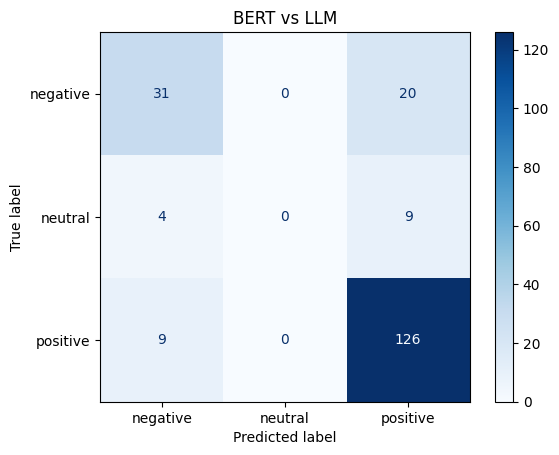

In [ ]:
# 📘 BERT vs LLM
print("📘 Classification Report: BERT vs LLM\n")
print(classification_report(df["target_llm"], df["target_predito"], zero_division=0))
ConfusionMatrixDisplay.from_predictions(df["target_llm"], df["target_predito"], cmap="Blues")
plt.title("BERT vs LLM")
plt.show()


📗 Classification Report: BERT vs VADER

              precision    recall  f1-score   support

    negative       0.30      0.54      0.38        24
     neutral       0.00      0.00      0.00        42
    positive       0.79      0.92      0.85       133

    accuracy                           0.68       199
   macro avg       0.36      0.49      0.41       199
weighted avg       0.56      0.68      0.61       199



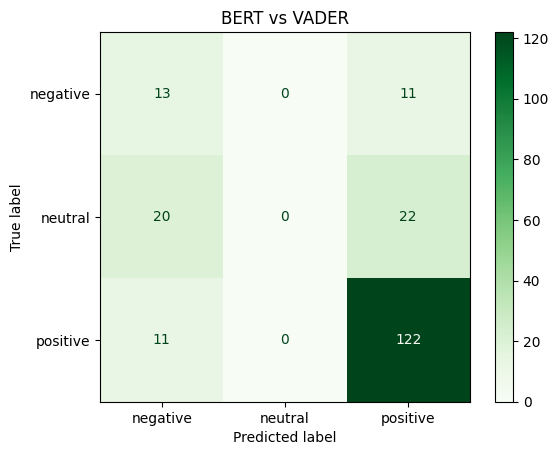

In [ ]:

# 📗 BERT vs VADER
print("📗 Classification Report: BERT vs VADER\n")
print(classification_report(df["target_vader"], df["target_predito"], zero_division=0))
ConfusionMatrixDisplay.from_predictions(df["target_vader"], df["target_predito"], cmap="Greens")
plt.title("BERT vs VADER")
plt.show()


📙 Classification Report: LLM vs VADER

              precision    recall  f1-score   support

    negative       0.71      0.33      0.45        51
     neutral       0.12      0.38      0.18        13
    positive       0.85      0.84      0.84       135

    accuracy                           0.68       199
   macro avg       0.56      0.52      0.49       199
weighted avg       0.77      0.68      0.70       199



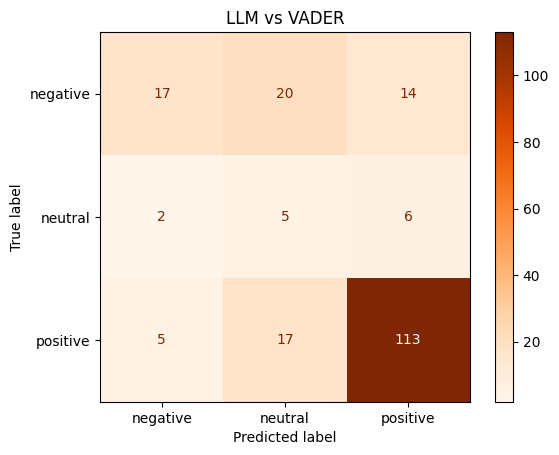

In [ ]:
# 📙 LLM vs VADER
print("📙 Classification Report: LLM vs VADER\n")
print(classification_report(df["target_llm"], df["target_vader"], zero_division=0))
ConfusionMatrixDisplay.from_predictions(df["target_llm"], df["target_vader"], cmap="Oranges")
plt.title("LLM vs VADER")
plt.show()